In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/clickbait/train.csv" # ariful
# path = "/content/drive/MyDrive/CSE440_Project/train.csv" # siam
df = pd.read_csv(path)

df.shape

(3195, 12)

In [ ]:
df.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,provenance,spoiler,spoilerPositions,tags
0,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,"['Wes Welker Wanted Dinner With Tom Brady, But...",reddit,['It’ll be just like old times this weekend fo...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,","{'source': 'anonymized', 'humanSpoiler': 'They...",['how about that morning we go throw?'],"[[[3, 151], [3, 186]]]",['passage']
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,411701128456593408,['NASA sets date for full recovery of ozone ho...,Twitter,['2070 is shaping up to be a great year for Mo...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...","{'source': 'anonymized', 'humanSpoiler': '2070...",['2070'],"[[[0, 0], [0, 4]]]",['phrase']
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,380537005123190784,"[""This is what makes employees happy -- and it...",Twitter,"[""Despite common belief, money isn't the key t...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...","{'source': 'anonymized', 'humanSpoiler': 'Inte...",['intellectual stimulation'],"[[[1, 186], [1, 210]]]",['phrase']
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,['Passion is overrated —\xa07 work habits you ...,Twitter,"['It’s common wisdom. Near gospel really, and ...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers","{'source': 'anonymized', 'humanSpoiler': None,...",['Purpose connects us to something bigger and ...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",['multi']
4,31b108a3-c828-421a-a4b9-cf651e9ac859,814186311573766144,"[""The perfect way to cook rice so that it's pe...",Twitter,"['Boiling rice may seem simple, but there is a...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice","{'source': 'anonymized', 'humanSpoiler': None,...",['in a rice cooker'],"[[[5, 60], [5, 76]]]",['phrase']


In [ ]:
df.tags.value_counts() # check if the classes are balanced or not

['phrase']     1365
['passage']    1272
['multi']       558
Name: tags, dtype: int64

In [ ]:
df=df[['postText','targetParagraphs','targetTitle','targetDescription','tags']].dropna()
# reset the index
df = df.reset_index(drop=True)

In [ ]:
dfa = df.copy()
print(dfa.head(2))

                                            postText  \
0  ['Wes Welker Wanted Dinner With Tom Brady, But...   
1  ['NASA sets date for full recovery of ozone ho...   

                                    targetParagraphs  \
0  ['It’ll be just like old times this weekend fo...   
1  ['2070 is shaping up to be a great year for Mo...   

                                         targetTitle  \
0  Wes Welker Wanted Dinner With Tom Brady, But P...   
1  Hole In Ozone Layer Expected To Make Full Reco...   

                                   targetDescription         tags  
0  It'll be just like old times this weekend for ...  ['passage']  
1  2070 is shaping up to be a great year for Moth...   ['phrase']  


In [ ]:
# convert the tags column to an integer value.
dfa['int_tag'] = dfa.tags.map({"['phrase']":0,"['passage']":1,"['multi']":2})

In [ ]:
dfa.head(4)

,postText,targetParagraphs,targetTitle,targetDescription,tags,int_tag
0,"['Wes Welker Wanted Dinner With Tom Brady, But...",['It’ll be just like old times this weekend fo...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,['passage'],1
1,['NASA sets date for full recovery of ozone ho...,['2070 is shaping up to be a great year for Mo...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,['phrase'],0
2,"[""This is what makes employees happy -- and it...","[""Despite common belief, money isn't the key t...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,['phrase'],0
3,['Passion is overrated —\xa07 work habits you ...,"['It’s common wisdom. Near gospel really, and ...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,['multi'],2


In [ ]:
dfa = dfa.drop(['tags'], axis=1)
dfa.head(4)

,postText,targetParagraphs,targetTitle,targetDescription,int_tag
0,"['Wes Welker Wanted Dinner With Tom Brady, But...",['It’ll be just like old times this weekend fo...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,1
1,['NASA sets date for full recovery of ozone ho...,['2070 is shaping up to be a great year for Mo...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,0
2,"[""This is what makes employees happy -- and it...","[""Despite common belief, money isn't the key t...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,0
3,['Passion is overrated —\xa07 work habits you ...,"['It’s common wisdom. Near gospel really, and ...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,2


In [ ]:
! python -m spacy download en_core_web_lg

2023-05-11 16:36:11.474698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 16:36:12.571946: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
dfa['postText_vec'] = None

for i in range(0,len(df)):
    text = dfa.loc[i, 'postText']
    text = eval(text)
    vec = nlp(text[0])
    dfa['postText_vec'][i] = vec.vector

<ipython-input-15-cc84caccc093>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['postText_vec'][i] = vec.vector


In [ ]:
dfa['targetTitle_vec'] = None
for i in range(0,len(df)):
    text = dfa.loc[i, 'targetTitle']
    vec = nlp(str(text))
    dfa['targetTitle_vec'][i] = vec.vector

<ipython-input-16-bd724272847a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['targetTitle_vec'][i] = vec.vector


In [ ]:
dfa['targetDescription_vec'] = None
for i in range(0,len(df)):
    text = dfa.loc[i, 'targetDescription']
    vec = nlp(str(text))
    dfa['targetDescription_vec'][i] = vec.vector

<ipython-input-17-01e311a122b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['targetDescription_vec'][i] = vec.vector


In [ ]:
dfa.head(3)

,postText,targetParagraphs,targetTitle,targetDescription,int_tag,postText_vec,targetTitle_vec,targetDescription_vec
0,"['Wes Welker Wanted Dinner With Tom Brady, But...",['It’ll be just like old times this weekend fo...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,1,"[-2.0979686, 0.6063779, -0.94384354, 0.3092747...","[-2.498104, 0.88412607, -0.5298207, 0.1868631,...","[-1.8353769, 1.0711681, -1.7202758, 0.18997319..."
1,['NASA sets date for full recovery of ozone ho...,['2070 is shaping up to be a great year for Mo...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,0,"[-1.8265146, -0.8172922, -1.4787078, 0.1865631...","[-0.55992067, -0.9638871, 0.8794559, -0.824101...","[-1.5672935, 1.6376957, -2.4868062, -0.0351003..."
2,"[""This is what makes employees happy -- and it...","[""Despite common belief, money isn't the key t...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,0,"[-0.13099767, 3.526263, -3.4332871, -1.6861632...","[-0.761644, -2.477749, 0.31437, 2.4237597, 2.9...","[-0.82971394, -0.13521388, -0.4544737, 0.83729..."


In [ ]:
dfa['targetParagraphs_vec'] = None

In [ ]:
def paragraph_vector(sentences):
  paragraph = ''
  for text in sentences:
    paragraph = paragraph + text

  vec = nlp(str(paragraph))
  return vec.vector

for i in range(0, len(dfa)):
  sentences = eval(dfa.loc[i, 'targetParagraphs'])
  para_vector = paragraph_vector(sentences)
  dfa['targetParagraphs_vec'][i] = para_vector

<ipython-input-20-d8603a472b81>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['targetParagraphs_vec'][i] = para_vector


In [ ]:
dfa.head(3)

,postText,targetParagraphs,targetTitle,targetDescription,int_tag,postText_vec,targetTitle_vec,targetDescription_vec,targetParagraphs_vec
0,"['Wes Welker Wanted Dinner With Tom Brady, But...",['It’ll be just like old times this weekend fo...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,1,"[-2.0979686, 0.6063779, -0.94384354, 0.3092747...","[-2.498104, 0.88412607, -0.5298207, 0.1868631,...","[-1.8353769, 1.0711681, -1.7202758, 0.18997319...","[-0.95343906, 1.4473202, -2.0374784, -0.509594..."
1,['NASA sets date for full recovery of ozone ho...,['2070 is shaping up to be a great year for Mo...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,0,"[-1.8265146, -0.8172922, -1.4787078, 0.1865631...","[-0.55992067, -0.9638871, 0.8794559, -0.824101...","[-1.5672935, 1.6376957, -2.4868062, -0.0351003...","[-1.7398078, 0.97522223, -1.5949261, 0.5460704..."
2,"[""This is what makes employees happy -- and it...","[""Despite common belief, money isn't the key t...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,0,"[-0.13099767, 3.526263, -3.4332871, -1.6861632...","[-0.761644, -2.477749, 0.31437, 2.4237597, 2.9...","[-0.82971394, -0.13521388, -0.4544737, 0.83729...","[-1.3953168, 0.9449824, -2.4384086, 0.12014902..."


# **Model** **Training**


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score

import numpy as np

In [ ]:
# independent variable
X = dfa['targetTitle']
# dependent variable
y = dfa['int_tag']

In [ ]:
# Split the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('LR', LogisticRegression())
])

In [ ]:
clf_NB = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('NB', MultinomialNB())
])

In [ ]:
#fit with X_train and y_train
clf.fit(X_train, y_train)

# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


# print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.66      0.61       269
           1       0.48      0.56      0.52       216
           2       0.67      0.07      0.12        88

    accuracy                           0.53       573
   macro avg       0.57      0.43      0.42       573
weighted avg       0.55      0.53      0.50       573



In [ ]:
#fit with X_train and y_train
clf_NB.fit(X_train, y_train)

# get the predictions for X_test and store it in y_pred
y_pred = clf_NB.predict(X_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.65      0.59       269
           1       0.47      0.54      0.50       216
           2       1.00      0.02      0.04        88

    accuracy                           0.51       573
   macro avg       0.67      0.40      0.38       573
weighted avg       0.59      0.51      0.47       573



***Logistic Regression gives better result***

In [ ]:
y_preds = clf.predict(X_test)

### Confusion Matrix

Text(8.222222222222223, 0.5, 'Prediction')

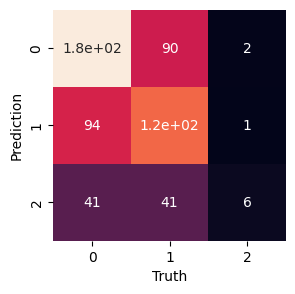

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False)
plt.xlabel("Truth")
plt.ylabel("Prediction")

Text(8.222222222222223, 0.5, 'Prediction')

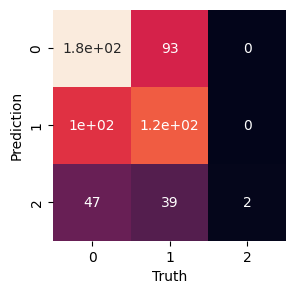

In [ ]:
y_preds = clf_NB.predict(X_test)

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False)
plt.xlabel("Truth")
plt.ylabel("Prediction")

### Cross Validation
`Accuracy` tells us how many times the ML model was correct overall. `Precision` is how good the model is at predicting a specific category. `Recall` tells us how many times the model was able to detect a specific category. `F1 Score` is the harmonic mean between precision and recall.

In [ ]:
# Cross-validated Accuracy
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.5284839941908005

In [ ]:
# Cross-validated Precision

cv_precision = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="precision_macro")
cv_precision = np.mean(cv_precision)
cv_precision

0.5850448260648945

In [ ]:
# Cross-validated Recall

cv_recall = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="recall_macro")
cv_recall = np.mean(cv_recall)
cv_recall

0.4413649364103119

In [ ]:
# Cross-validated F1

cv_f1 = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="f1_macro")
cv_f1 = np.mean(cv_f1)
cv_f1

0.43660323959761227

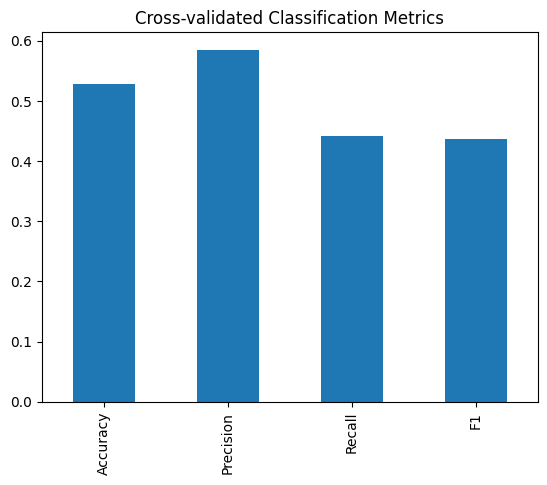

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False);

In [ ]:
# Cross-validated Accuracy
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(clf_NB, X, y,
                        cv=5,
                        scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.50366797251614

In [ ]:
# Cross-validated Precision

cv_precision = cross_val_score(clf_NB, X, y,
                        cv=5,
                        scoring="precision_macro")
cv_precision = np.mean(cv_precision)
cv_precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

0.40289452805834874

In [ ]:
# Cross-validated Recall

cv_recall = cross_val_score(clf_NB, X, y,
                        cv=5,
                        scoring="recall_macro")
cv_recall = np.mean(cv_recall)
cv_recall

0.3984209534652549

In [ ]:
# Cross-validated F1

cv_f1 = cross_val_score(clf_NB, X, y,
                        cv=5,
                        scoring="f1_macro")
cv_f1 = np.mean(cv_f1)
cv_f1

0.36295539906522123

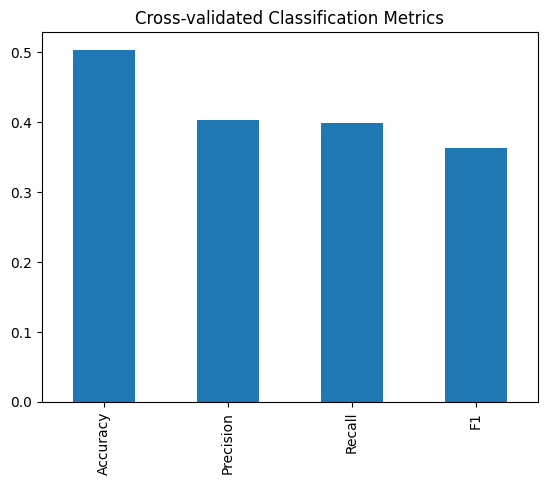

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False);